Using the `nycflights13` package/data, which three airlines performed the most flights in 2013.

Hints:  
- The `airlines` table provides the name of each airline
- Each row in the `flights` table represents one flight
- Use `group_by`, `summarize`,  and `arrange` 

In [1]:
library ('tidyverse')
library ('nycflights13')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Re-create the following figure:

(*Hint: use* `forcats` *to lump and reorder by number of flights*)

In [2]:
flights |> head (2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


In [3]:
airlines |> head (2)

carrier,name
<chr>,<chr>
9E,Endeavor Air Inc.
AA,American Airlines Inc.


In [5]:
flights2 = flights |> 
    left_join (airlines) 

flights2 |> head ()

Joining, by = "carrier"


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<chr>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,United Air Lines Inc.


In [7]:
flights2 |>
    mutate (name_lumped = fct_lump (name, n = 10)) |>
    count (name_lumped)

name_lumped,n
<fct>,<int>
American Airlines Inc.,32729
Delta Air Lines Inc.,48110
Endeavor Air Inc.,18460
Envoy Air,26397
ExpressJet Airlines Inc.,54173
JetBlue Airways,54635
Southwest Airlines Co.,12275
United Air Lines Inc.,58665
US Airways Inc.,20536


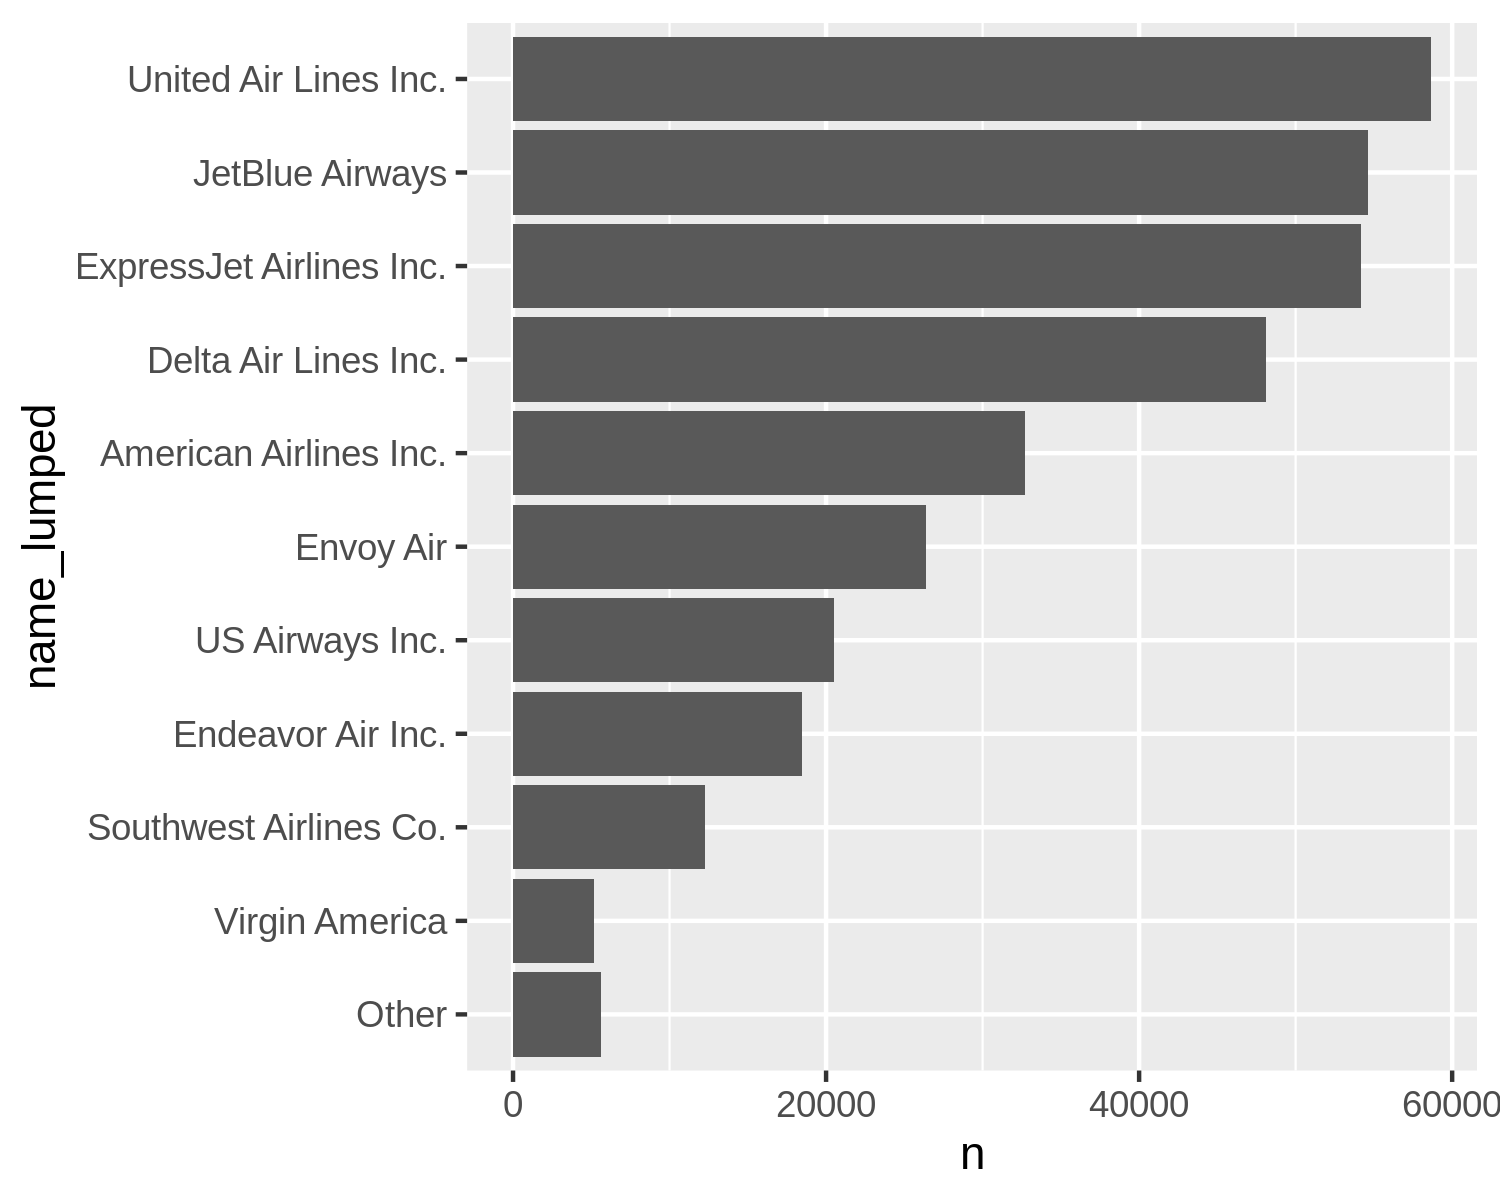

In [12]:
flights3 = flights2 |>
    mutate (name_lumped = fct_lump (name, n = 10)) |>
    group_by (name_lumped) |>
    summarize (n = n()) |>
    arrange (n) |> 
    mutate (name_lumped = fct_inorder (name_lumped) |> fct_relevel ('Other'))

p = ggplot (flights3, aes (y = name_lumped, x = n)) + geom_col ()

p

<img src="figs/flights_bar.png" style="width: 600px;"/>